In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3

In [2]:
with sqlite3.connect('/home/vishwas/DR/kinematic/dataset/Logger.db') as conn:
    c = conn.cursor()
    c.execute("select id, params, mapnum, executiontime from logs where id in (select id from logs where (mapnum, timestamp) in \
                       (select mapnum, max(timestamp) from logs where status = 1 group by mapnum)) order by mapnum")    
    data = c.fetchall()
    data = np.array(data)
    update = []
    for row in data:
        update.append([int(row[0]), eval(row[1]), int(row[2]), float(row[3])])

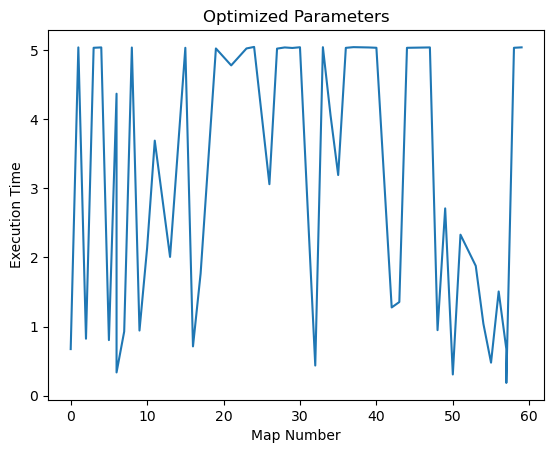

In [3]:
fig, ax = plt.subplots()
ax.set_title('Optimized Parameters')
ax.set_xlabel('Map Number')
ax.set_ylabel('Execution Time')
ax.plot([row[2] for row in update], [row[3] for row in update])
plt.show()

In [ ]:
# list all the files in the directory
import os

path = '/home/vishwas/DR/kinematic/Default_Database'
files = os.listdir(path)
files = [file for file in files if file.endswith('.db')]
files = [os.path.join(path, file) for file in files]
files.sort()
default_times = []
print(files)
for f in files:
    with sqlite3.connect(f) as conn:
        c = conn.cursor()
        # get all table names
        # c.execute("select name from sqlite_master where type='table'")
        c.execute("select min(time) from runs where status = 6")
        data = c.fetchall()
        try:
            data = float(data[0][0])
        except:
            data = 10 
        default_times.append(data)


In [ ]:
default_times = default_times[:len(update)]

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Default Parameters')
ax.set_xlabel('Map Number')
ax.set_ylabel('Execution Time')
ax.plot([i for i in range(1, len(default_times) + 1)], default_times)
plt.show()


In [4]:
# Read the data from txt file
with open('/home/vishwas/DR/kinematic/Benchmarking.txt', 'r') as f:
    data = f.readlines()
    data = [float(d) for d in data]
    default_times = data[:60]


In [5]:
modified_deafult = []
# print(len(default_times), len(update))
for i in range(len(default_times)):
    for j in range(len(update)):
        if update[j][2] == i:
            modified_deafult.append(default_times[i])
            flag = True
            break

In [9]:
len(modified_deafult), len(update)

(51, 53)

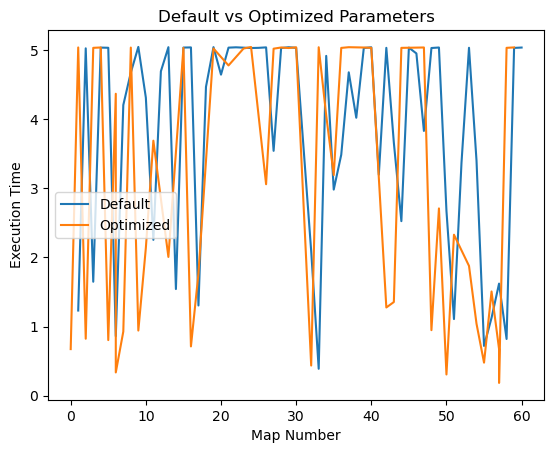

In [11]:
# compare the two
fig, ax = plt.subplots()
ax.set_title('Default vs Optimized Parameters')
ax.set_xlabel('Map Number')
ax.set_ylabel('Execution Time')
ax.plot([i for i in range(1, len(default_times) + 1)], default_times, label='Default')
ax.plot([row[2] for row in update], [row[3] for row in update], label='Optimized')
plt.legend()
plt.show()

In [9]:
# check the cases where the optimized parameters have lower execution time
count = 0
# print(len(default_times), len(update))
flag = False
for i in range(len(default_times)):
    flag = False
    for j in range(len(update)):
        if update[j][2] == i:
            flag = True
            break
    try:
        if default_times[i] > update[i][3] and flag:
            count += 1
    except:
        pass


In [10]:
count

28

In [10]:
update

[[12476, [7.9412064726054385, 0.23802929436389392, 7], 0, 0.6734704971313477],
 [12462, [5.005, 0.355, 2], 1, 5.03510594367981],
 [12483, [7.9412064726054385, 0.23802929436389392, 7], 2, 0.823401689529419],
 [12469, [5.005, 0.355, 2], 3, 5.029645919799805],
 [12349, [5.966359738148821, 0.3425987089247569, 2], 4, 5.034869432449341],
 [12482, [3.536987436744205, 0.2827652611398258, 2], 5, 0.8037171363830566],
 [12480, [5.005, 0.355, 2], 6, 4.365728139877319],
 [12481, [5.005, 0.355, 2], 6, 0.33611631393432617],
 [12401, [5.707536079342314, 0.6104726026031488, 7], 7, 0.9276096820831299],
 [12244, [4.396005914405897, 0.37433325983331023, 7], 8, 5.033583641052246],
 [12477, [5.005, 0.355, 2], 9, 0.9417097568511963],
 [20065, [8.035963120314227, 0.07197256620507807, 7], 10, 2.1360318660736084],
 [26247, [7.066909615913972, 0.19188253735610727, 4], 11, 3.6872103214263916],
 [19508, [3.14451167079842, 0.060642940456553746, 8], 13, 2.0060982704162598],
 [38606, [9.032323817557948, 0.41030882737

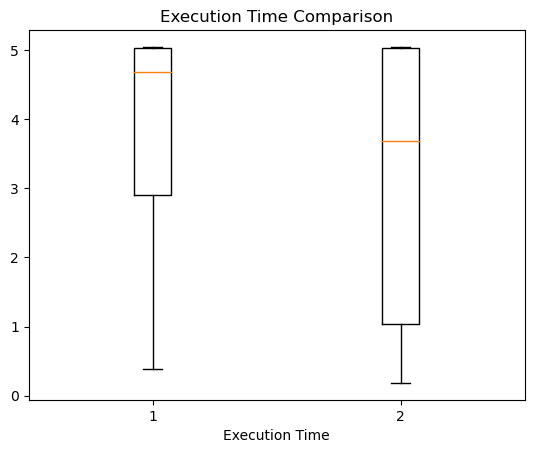

In [12]:
# make 2 box plot for the execution times
fig, ax = plt.subplots()
ax.set_title('Execution Time Comparison')
ax.set_xlabel('Execution Time')
ax.boxplot([default_times, [row[3] for row in update]])
plt.show()



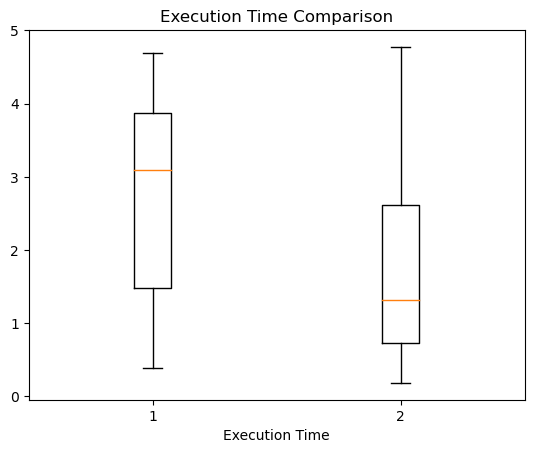

In [13]:
# remove all data that are more than 4.9 seconds
default_times = [d for d in default_times if d < 4.9]
update = [row for row in update if row[3] < 4.9]

# make 2 box plot for the execution times
fig, ax = plt.subplots()
ax.set_title('Execution Time Comparison')
ax.set_xlabel('Execution Time')
ax.boxplot([default_times, [row[3] for row in update]])
plt.show()


In [14]:
len(default_times), len(update)

(32, 30)

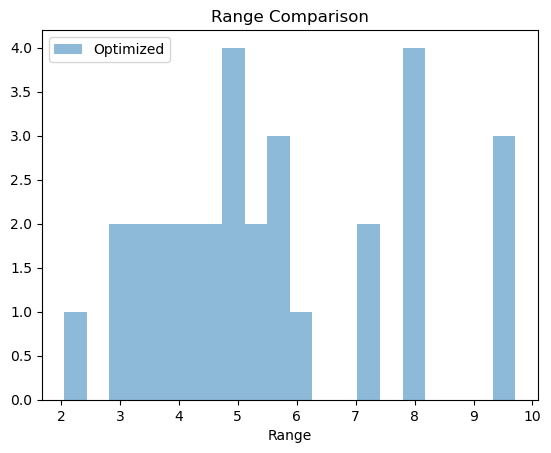

In [16]:
# histogram of range, goal bias

fig, ax = plt.subplots()
ax.set_title('Range Comparison')
ax.set_xlabel('Range')
ax.hist([row[1][0] for row in update], bins=20, alpha=0.5, label='Optimized')
# ax.hist([0.5 for _ in default_times], bins=20, alpha=0.5, label='Default')
plt.legend()
plt.show()



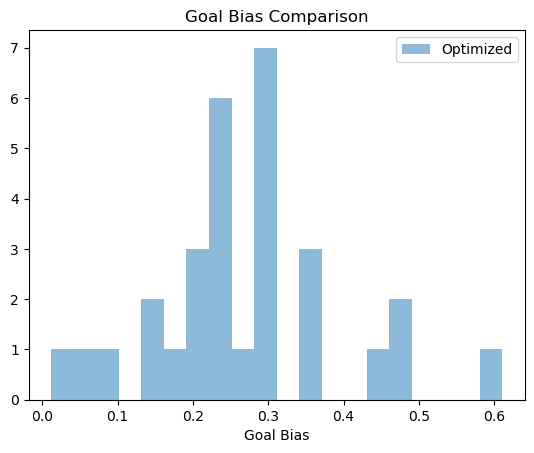

In [17]:
fig, ax = plt.subplots()
ax.set_title('Goal Bias Comparison')
ax.set_xlabel('Goal Bias')
ax.hist([row[1][1] for row in update], bins=20, alpha=0.5, label='Optimized')
# ax.hist([0.5 for _ in default_times], bins=20, alpha=0.5, label='Default')
plt.legend()
plt.show()
